In [11]:
# Importing libraries required
import pandas as pd
import cv2
import numpy as np
from matplotlib import pyplot as plt
import os
from os import listdir

In [2]:
train_excel = pd.read_csv("Train.csv")
train_excel

,Width,Height,Roi.X1,Roi.Y1,Roi.X2,Roi.Y2,ClassId,Path
0,27,26,5,5,22,20,20,Train/20/00020_00000_00000.png
1,28,27,5,6,23,22,20,Train/20/00020_00000_00001.png
2,29,26,6,5,24,21,20,Train/20/00020_00000_00002.png
3,28,27,5,6,23,22,20,Train/20/00020_00000_00003.png
4,28,26,5,5,23,21,20,Train/20/00020_00000_00004.png
...,...,...,...,...,...,...,...,...
39204,52,56,5,6,47,51,42,Train/42/00042_00007_00025.png
39205,56,58,5,5,51,53,42,Train/42/00042_00007_00026.png
39206,58,62,5,6,53,57,42,Train/42/00042_00007_00027.png
39207,63,69,5,7,58,63,42,Train/42/00042_00007_00028.png


In [8]:
# img = train_excel['Path'][0]
# img

train_images = []
for i in range(len(train_excel)):
    temp_img = cv2.imread(train_excel['Path'][i])
    train_images.append(temp_img)


KeyboardInterrupt: 

In [ ]:
len(train_images)

In [12]:
path = r'C:\Users\rammo\ML_winter\Project1\JPEGImages'

img_org = []
for images in os.listdir(path):
    if(images.endswith(".jpg") or images.endswith(".jpeg")):
        img_org.append(images)

In [14]:
len(img_org)

9532

In [26]:
actions = []
for i in range(len(img_org)):
    temp = img_org[i]
    actions.append(temp.split('_')[0])

In [28]:
# actions

In [65]:
actions = np.array(actions)
actions_count = np.unique(actions, return_counts=True)

In [69]:
actions_count[1]

284

In [59]:
action_images = []
for i in range(len(img_org)):
#     print(i)
    temp_img = cv2.imread("JPEGImages/"+img_org[i])
    temp_img_rgb = cv2.cvtColor(temp_img, cv2.COLOR_BGR2RGB)
    temp_img_gray = cv2.cvtColor(temp_img_rgb, cv2.COLOR_RGB2GRAY)
    resized_temp = cv2.resize(temp_img_gray, (128, 128))
    # Data normalizing
    resized_temp = resized_temp.astype(np.float32)
    resized_temp = resized_temp/255
    action_images.append(resized_temp)

In [60]:
action_images = np.array(action_images)

In [61]:
# action_images = np.array(action_images)
action_images.shape

(9532, 128, 128)

In [62]:
action_images[0].shape

(128, 128)

In [64]:
# Reshaping images to get features of a single image in to a single array rather than 2d array

action_images_data = []

for i in range(len(action_images)):
    action_images_data.append(action_images[i].reshape(-1))

action_images_data = np.array(action_images_data)

# Shape represents: 1st=no of images, 2nd=total features for a corresponding image(128*128)
action_images_data.shape

(9532, 16384)

In [73]:
from sklearn.model_selection import train_test_split

Y = []
for i in range(len(actions_count[0])):
    Y.extend([i for j in range(actions_count[1][i])])
Y = np.array(Y)
X_train, X_test, y_train, y_test = train_test_split(action_images_data, Y, test_size=0.3, random_state=0)

print(X_train.shape, X_test.shape, y_train.shape, y_test.shape)

(6672, 16384) (2860, 16384) (6672,) (2860,)


In [75]:
Y

array([ 0,  0,  0, ..., 33, 33, 33])

In [76]:
y_train

array([10, 20, 19, ..., 16, 11,  9])

In [77]:
np.unique(y_train, return_counts=True)

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33]),
 array([193, 180, 151, 153, 202, 202, 278, 170, 214, 183, 335, 151, 202,
        214, 263, 177, 395, 147, 157, 164, 407, 132, 181, 162, 160, 131,
        139, 134, 156, 204, 130, 151, 143, 311], dtype=int64))

In [78]:
action_images_data[0].shape # 128*128

(16384,)

# Performing PCA

In [79]:
from sklearn import decomposition
pca = decomposition.PCA(n_components=5, whiten=True)
pca.fit(X_train)

PCA(n_components=5, whiten=True)

In [80]:
print(pca.components_.shape)

(5, 16384)


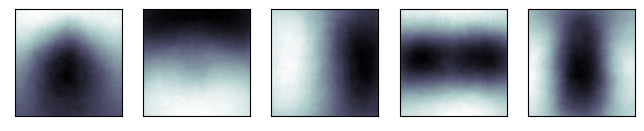

In [82]:
# The principal components measure deviations about this mean along orthogonal axes
fig = plt.figure(figsize=(8, 6))
for i in range(len(pca.components_)):
    ax = fig.add_subplot(3, 5, i + 1, xticks=[], yticks=[])
    ax.imshow(pca.components_[i].reshape(action_images[0].shape), cmap=plt.cm.bone)

In [83]:
X_train_pca = pca.transform(X_train)
X_test_pca = pca.transform(X_test)
print(X_train_pca.shape)
print(X_test_pca.shape)

(6672, 5)
(2860, 5)


In [84]:
X_train_pca[i]

array([-0.52539736, -0.5391378 , -0.5313095 , -1.0022154 , -1.4544936 ],
      dtype=float32)

In [85]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score

clf = KNeighborsClassifier(1)

In [86]:
clf.fit(X_train, y_train)

KNeighborsClassifier(n_neighbors=1)

In [87]:
Y_pred = clf.predict(X_test)

print("1KNN Accuracy: " + str(accuracy_score(y_test, Y_pred)))

1KNN Accuracy: 0.06013986013986014
